# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/7

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [9]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
#key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_Fi

## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


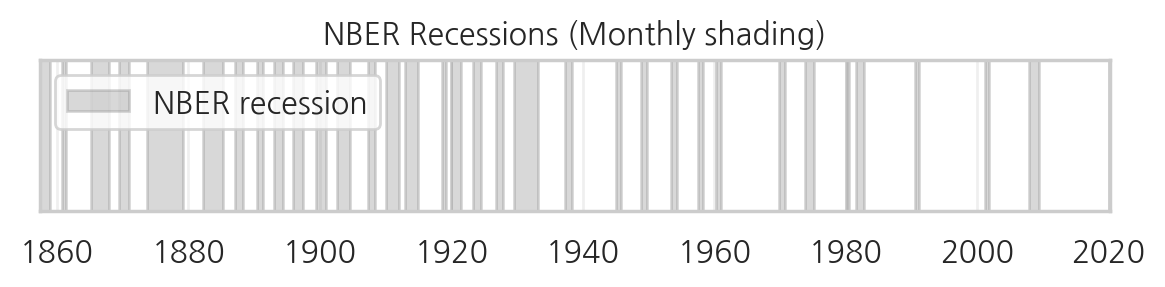

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## Keown and Pinkerton (1981)의 그림 1 패턴



Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Keown1981python.png


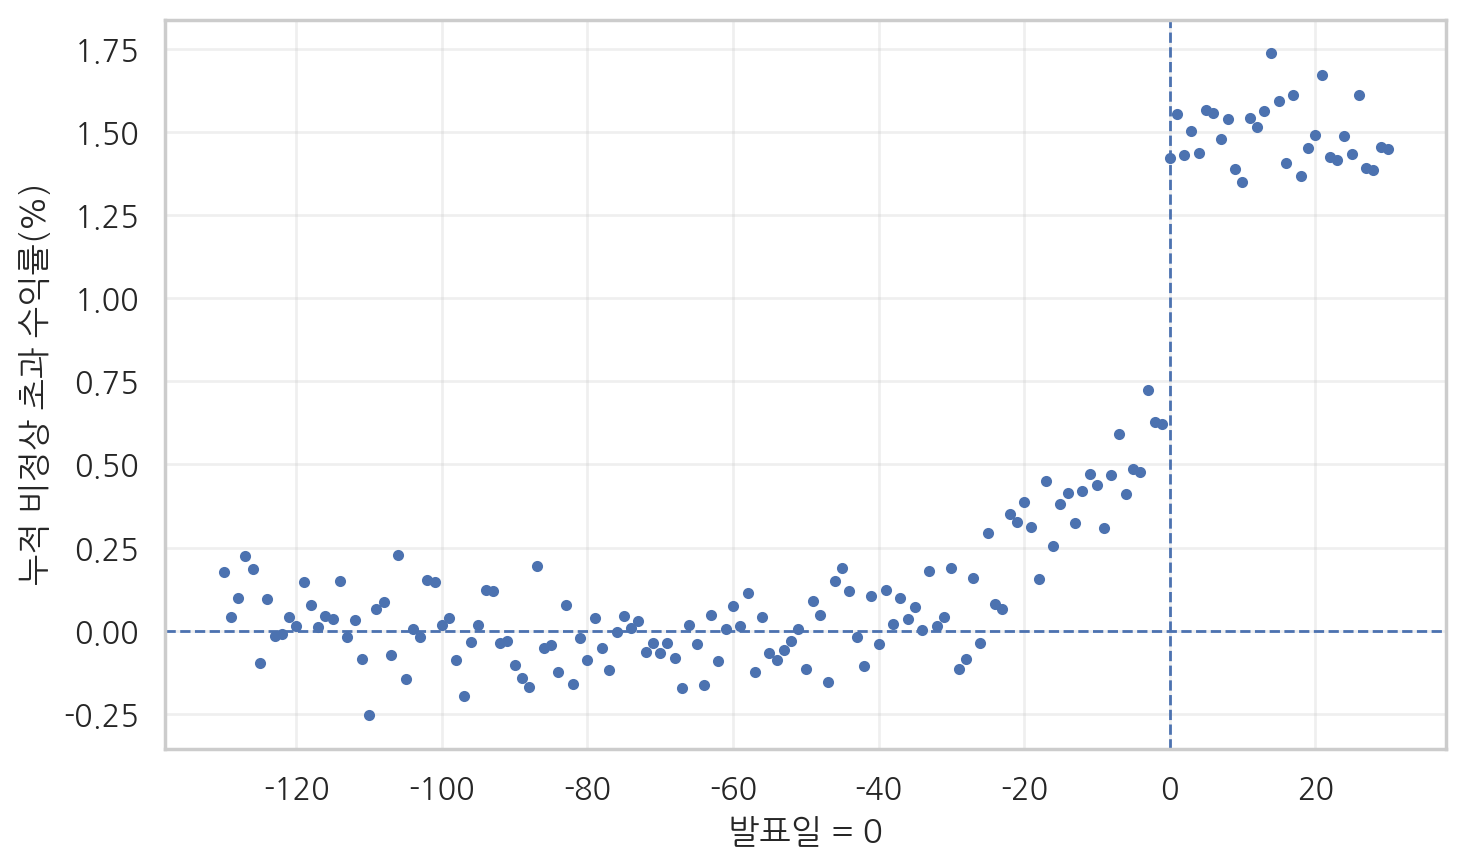

In [4]:
np.random.seed(0)
days = np.arange(-130, 31)
# 발표 전 소폭 하락, 직전 랠리, 발표일 점프, 이후 횡보를 '모형 데이터'로 구성
car = ( -0.00*(days<-30)
        + 0.02*( days+30)*( (days>=-30) & (days<0) )
        + 1.5*(days>=0) )
car = car + 0.1*np.random.randn(len(days))  # 잡음

fig, ax = plt.subplots(figsize=(7.5,4.5))
ax.plot(days, car, marker='.', linestyle='none')
ax.axvline(0, linewidth=1, linestyle='dashed')
ax.axhline(0, linewidth=1, linestyle='dashed')
ax.set_xlabel('발표일 = 0')
ax.set_ylabel('누적 비정상 초과 수익률(%)')
ax.set_title('')
plt.tight_layout()

save_fig('Keown1981python')
plt.show()

## Rendleman et al. (1982)의 그림 대략적으로 만들기

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Rendleman1982python.png


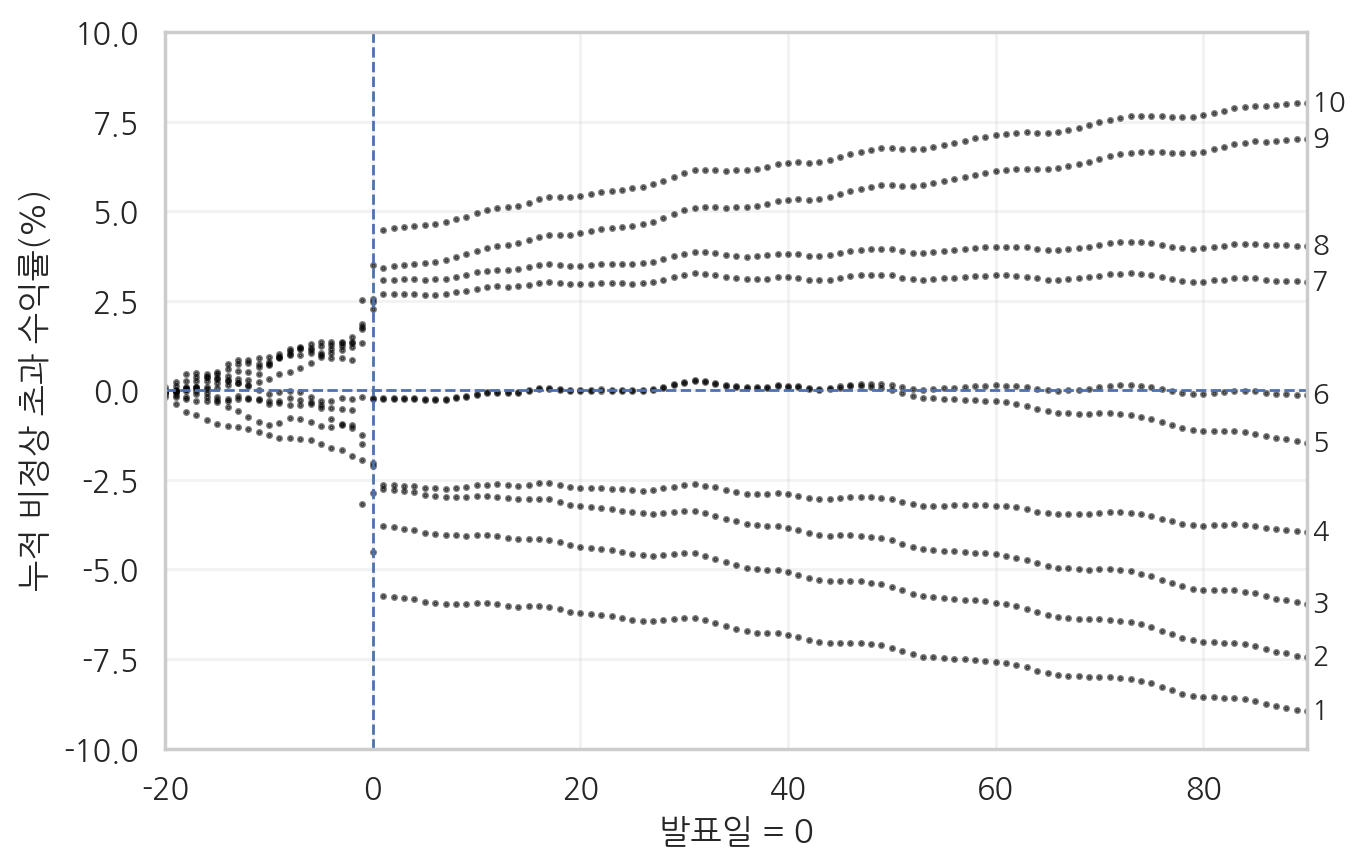

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def smooth_ma(x, window=5):
    if window <= 1:
        return x
    w = np.ones(window) / window
    pad = window // 2
    xp = np.r_[x[0]*np.ones(pad), x, x[-1]*np.ones(pad)]
    return np.convolve(xp, w, mode="valid")

# -----------------------------
# 1) axis
# -----------------------------
days = np.arange(-20, 91)
T = len(days)
event_idx = np.where(days == 0)[0][0]
rng = np.random.default_rng(42)

# -----------------------------
# 2) category shapes (#1..#10)
# -----------------------------
end_levels  = np.array([ 0.080, 0.070, 0.040, 0.030, 0.000,
                        -0.015,-0.040,-0.060,-0.075,-0.090 ])

jump_levels = np.array([ 0.030, 0.026, 0.018, 0.012, 0.000,
                        -0.006,-0.014,-0.020,-0.028,-0.034 ])

# ▶ pre 분화: 기울기 강화 (0.00025 → 0.0010)
pre_drift = np.linspace(0.0010, -0.0010, 10)

post_len = T - (event_idx + 1)
pre_len  = event_idx

# -----------------------------
# 3) PRE common wiggle (-20~0)
# -----------------------------
eps_pre = rng.normal(0, 0.0015, size=pre_len)
pre_common = np.cumsum(eps_pre)
pre_common -= np.linspace(pre_common[0], pre_common[-1], pre_len)
pre_common *= 0.55   # 공통 wiggle 강도

# -----------------------------
# 4) POST common wiggle (0 이후, 교차 방지용 공통 요인)
# -----------------------------
eps_low = rng.normal(0, 0.0018, size=post_len)
wiggle_low = np.cumsum(eps_low)
wiggle_low -= np.linspace(wiggle_low[0], wiggle_low[-1], post_len)

eps_hi = rng.normal(0, 0.0020, size=post_len)
wiggle_hi = np.cumsum(eps_hi)
wiggle_hi -= np.linspace(wiggle_hi[0], wiggle_hi[-1], post_len)

post_common = 0.30 * wiggle_low + 0.12 * wiggle_hi

cars = []

for d in range(10):
    car = np.zeros(T)

    # -------------------------
    # PRE (-20 ~ -1): 분화 강화
    # -------------------------
    pre_noise = rng.normal(0, 0.0016, size=pre_len)  # 개별 잡음 확대
    car[:event_idx] = (
        np.cumsum(pre_noise + pre_drift[d])
        + pre_common
    )
    car[:event_idx] -= car[0]

    # -------------------------
    # Day 0 jump
    # -------------------------
    car[event_idx] = car[event_idx-1] + jump_levels[d] + rng.normal(0, 0.0018)

    # -------------------------
    # POST (0 이후): drift + 공통 wiggle
    # -------------------------
    target_end = end_levels[d]
    drift = np.linspace(0, target_end - car[event_idx], post_len)

    if d == 4:  # #5 almost flat
        drift *= 0.20

    car[event_idx+1:] = car[event_idx] + drift + post_common

    # smoothing은 아주 약하게
    car = smooth_ma(car, window=3)

    cars.append(car)

cars = np.vstack(cars)

# -----------------------------
# 4-1) #6이 #5와 교차하지 않도록 보정
#      (#5는 index 4, #6은 index 5)
# -----------------------------
eps_sep = 0.0003  # 두 선 사이 최소 간격 (0.03%p 정도)
higher = cars[5, event_idx:] >= cars[4, event_idx:]
idx = np.where(higher)[0]
cars[5, event_idx + idx] = cars[4, event_idx + idx] - eps_sep

# -----------------------------
# 5) plot
# -----------------------------
fig, ax = plt.subplots(figsize=(7,4.5))

# 아래쪽이 #1, 위쪽이 #10이 되도록 역순으로 plot
plot_order = range(9, -1, -1)  # 9,8,...,0

for _, i in enumerate(plot_order):
    ax.plot(
        days,
        100 * cars[i],
        color="black",
        linestyle="none",   # 선 없이
        marker="o",         # 점으로만
        markersize=1.5,      # ★ 더 작은 점
        alpha=0.5
    )

ax.axvline(0, linewidth=1, linestyle='dashed')
ax.axhline(0, linewidth=1, linestyle='dashed')

ax.set_xlim(days.min(), days.max())
ax.set_ylim(-10, 10)
ax.set_xlabel("발표일 = 0")
ax.set_ylabel("누적 비정상 초과 수익률(%)")

# 라벨: 가장 아래(가장 음수)가 #1, 가장 위(가장 양수)가 #10
x_label = days.max() - 1
for label_num, i in enumerate(plot_order, start=1):
    ax.text(
        x_label + 1.5,
        100 * cars[i, -1],
        f"{label_num}",
        va="center",
        fontsize=10
    )

ax.grid(True, alpha=0.25)
plt.tight_layout()

save_fig('Rendleman1982python')
plt.show()


## AR(1)의 충격반응분석

In [6]:
def AR_impulse_response(rho, n_periods=10):
    """
    Calculate the impulse response function of an AR(1) process.

    Parameters:
        rho (float): AR(1) coefficient.
        n_periods (int): Number of periods for the impulse response.

    Returns:
        irf (numpy.ndarray): Impulse response function.
    """
    irf = np.zeros(n_periods)
    irf[0] = 1  # Impulse response at t=0 is 1

    for t in range(1, n_periods):
        irf[t] = rho * irf[t-1]

    return irf

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/AR1_IR.png


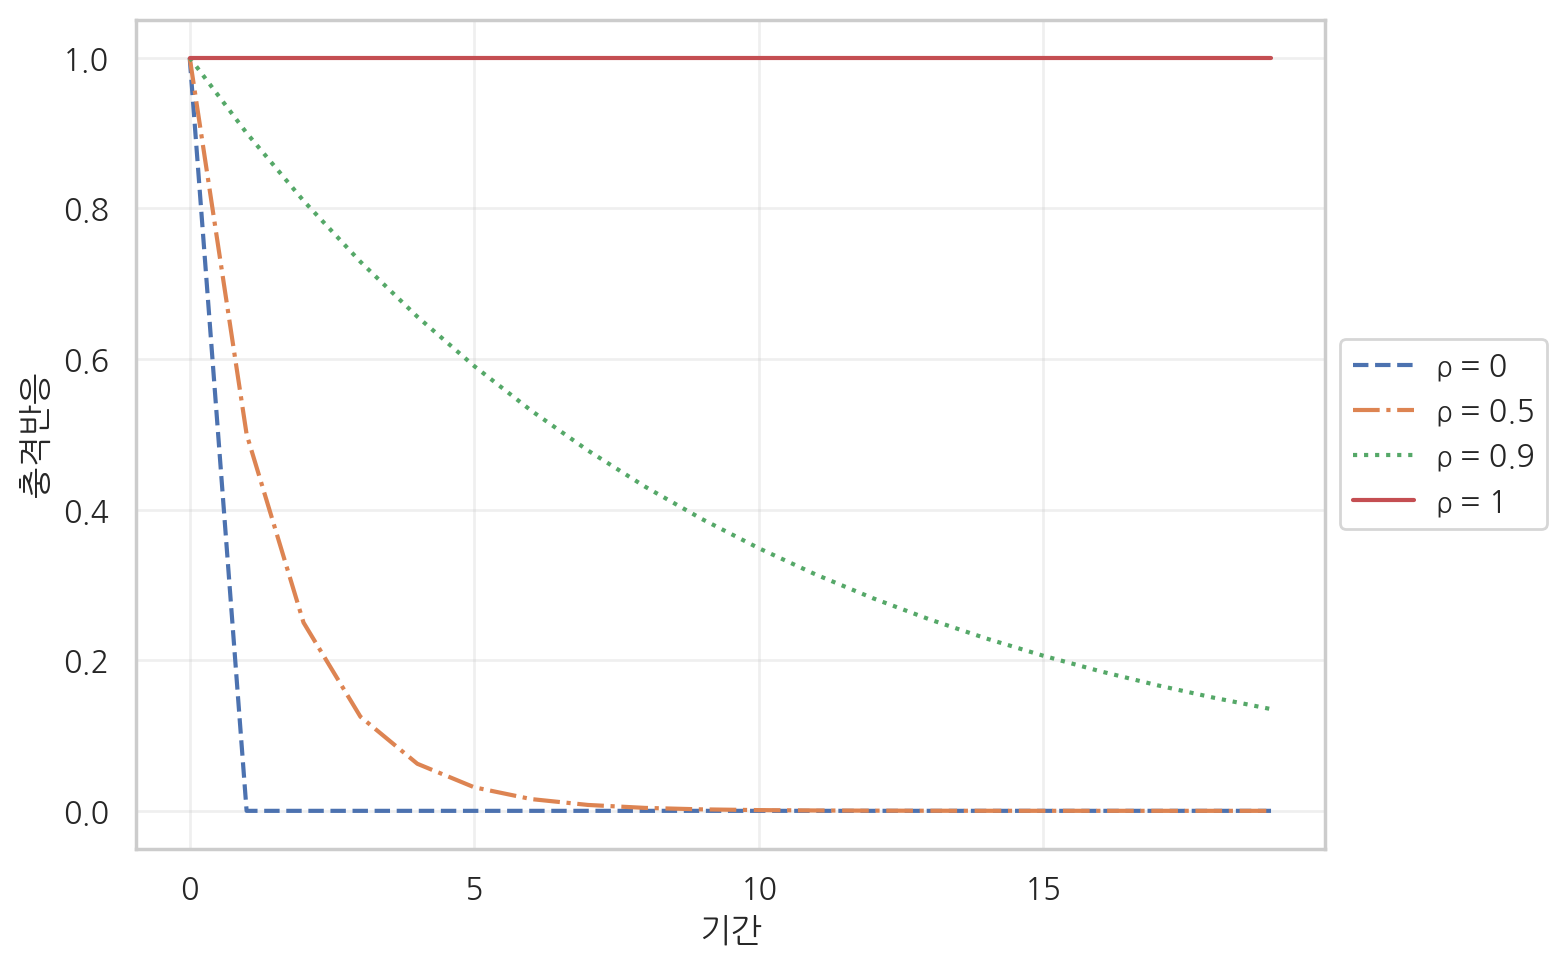

In [7]:
# Define different AR(1) coefficients
rhos = [0, 0.5, 0.9, 1]

# Number of periods for impulse response
n_periods = 20

style_list=['--','-.',':','-'] # list of basic linestyles
rho_unicode = "\u03C1"

for i, rho in enumerate(rhos):
    irf = AR_impulse_response(rho, n_periods)
    plt.plot(irf, label=f'{rho_unicode} = {rho}', linestyle=style_list[i])

#plt.title('AR(1)의 충격반응분석')
plt.xlabel('기간')
plt.ylabel('충격반응')
plt.xticks(np.arange(0, 20, 5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

save_fig('AR1_IR')
plt.show()